# Privacy Attacks

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import torch

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
torch.set_num_threads(1)
cwd = os.path.join(os.getcwd(), '..', '..')

p_english_list = [0.005, 0.01, 0.05,
                 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                 0.95, 0.99, 0.995]
out_rate = 1000

## Attack sketches

In [11]:
all_cores_dir = os.path.join(cwd, 'results', '6_privacy', 'fffc_tiny', 'cores')

acc_diffs_cores = []
for p in p_english_list[1:-1]:
    p_acc_diff = []
    for idx in range(10):
        cores_dir = os.path.join(all_cores_dir, str(p), str(idx))
        files_lst = os.listdir(cores_dir)
        for f in files_lst:
            test_acc = float(f.split('_')[1])
            sketch_acc = float(f.split('_')[2][:-3])
            p_acc_diff.append(sketch_acc - test_acc)
        
    p_acc_diff = torch.Tensor(p_acc_diff)
    acc_diffs_cores.append((p, (p_acc_diff.mean(), p_acc_diff.std())))

acc_diffs_cores = dict(acc_diffs_cores)
acc_diffs_cores

{0.01: (tensor(0.0444), tensor(0.0876)),
 0.05: (tensor(0.0101), tensor(0.1399)),
 0.1: (tensor(0.0036), tensor(0.0873)),
 0.2: (tensor(0.0219), tensor(0.0988)),
 0.3: (tensor(0.0025), tensor(0.0797)),
 0.4: (tensor(0.0248), tensor(0.0733)),
 0.5: (tensor(0.0269), tensor(0.0691)),
 0.6: (tensor(-0.0063), tensor(0.1006)),
 0.7: (tensor(0.0431), tensor(0.0757)),
 0.8: (tensor(0.0352), tensor(0.0822)),
 0.9: (tensor(0.0085), tensor(0.0863)),
 0.95: (tensor(0.0361), tensor(0.0672)),
 0.99: (tensor(0.0401), tensor(0.0728))}

In [12]:
all_recores_dir = os.path.join(cwd, 'results', '6_privacy', 'fffc_tiny', 'recores')

acc_diffs_recores = []
for p in p_english_list[1:-1]:
    p_acc_diff = []
    for idx in range(10):
        recores_dir = os.path.join(all_recores_dir, str(p), str(idx))
        files_lst = os.listdir(recores_dir)
        for f in files_lst:
            test_acc = float(f.split('_')[1])
            sketch_acc = float(f.split('_')[2][:-3])
            p_acc_diff.append(sketch_acc - test_acc)
        
    p_acc_diff = torch.Tensor(p_acc_diff)
    acc_diffs_recores.append((p, (p_acc_diff.mean(), p_acc_diff.std())))

acc_diffs_recores = dict(acc_diffs_recores)
acc_diffs_recores

{0.01: (tensor(0.0236), tensor(0.0759)),
 0.05: (tensor(-0.0303), tensor(0.1128)),
 0.1: (tensor(-0.0217), tensor(0.0801)),
 0.2: (tensor(-0.0153), tensor(0.0770)),
 0.3: (tensor(-0.0055), tensor(0.0633)),
 0.4: (tensor(0.0065), tensor(0.0696)),
 0.5: (tensor(0.0265), tensor(0.0512)),
 0.6: (tensor(-0.0183), tensor(0.0659)),
 0.7: (tensor(0.0059), tensor(0.0552)),
 0.8: (tensor(0.0334), tensor(0.0719)),
 0.9: (tensor(0.0021), tensor(0.0749)),
 0.95: (tensor(0.0228), tensor(0.0556)),
 0.99: (tensor(0.0240), tensor(0.0612))}

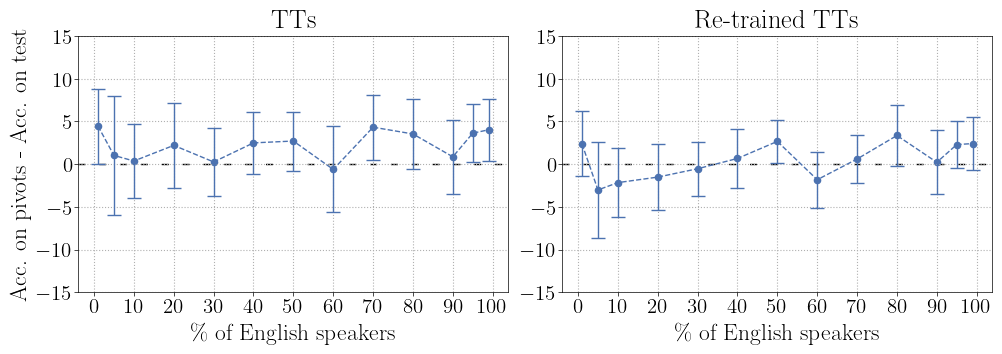

In [13]:
palette = sns.color_palette("deep")
colors = palette[0], palette[1], palette[2]

plt.rc('font', family='serif', serif='Computer Modern', size=16)
plt.rc('text', usetex=True)


# Set global font sizes
plt.rcParams['axes.linewidth'] = 0.5  # Default is usually 1.0
plt.rcParams['axes.titlesize'] = 19  # Title font size
plt.rcParams['axes.labelsize'] = 17  # Axis label font size
plt.rcParams['xtick.labelsize'] = 15  # X-axis tick label font size
plt.rcParams['ytick.labelsize'] = 15  # Y-axis tick label font size
plt.rcParams['legend.fontsize'] = 15


fig, axs = plt.subplots(1, 2, figsize=(10, 3.5))
ps = [p * 100 for p in p_english_list[1:-1]]

# Cores
# -----
means = torch.stack(list(map(lambda t: t[0] * 100,
                             acc_diffs_cores.values()))).tolist()
stds = torch.stack(list(map(lambda t: t[1] * 100 * 0.5,
                            acc_diffs_cores.values()))).tolist()

axs[0].errorbar(x=ps, y=means, yerr=stds, capsize=5.,
                linestyle='--', linewidth=1., color=colors[0])
axs[0].scatter(x=ps, y=means, marker='o', s=20., color=colors[0])

# Set axes
axs[0].set_xlabel('\% of English speakers')
axs[0].set_ylabel('Acc. on pivots - Acc. on test')
axs[0].set_title('TTs')

axs[0].set_ylim(-15, 15)
axs[0].yaxis.grid(linestyle=':')
axs[0].xaxis.grid(linestyle=':')

axs[0].set_xticks(torch.arange(100*0., 100*1.05, 10))
axs[0].set_yticks(torch.arange(-15, 20, 5))

axs[0].axhline(y=0, linestyle=(0, (5, 10)), linewidth=1.,
               color='black', zorder=-1)

# Recores
# -------
means = torch.stack(list(map(lambda t: t[0] * 100,
                             acc_diffs_recores.values()))).tolist()
stds = torch.stack(list(map(lambda t: t[1] * 100 * 0.5,
                            acc_diffs_recores.values()))).tolist()

axs[1].errorbar(x=ps, y=means, yerr=stds, capsize=5.,
                linestyle='--', linewidth=1., color=colors[0])
axs[1].scatter(x=ps, y=means, marker='o', s=20., color=colors[0])

# Set axes
axs[1].set_xlabel('\% of English speakers')
axs[1].set_title('Re-trained TTs')

axs[1].set_ylim(-15, 15)
axs[1].yaxis.grid(linestyle=':')
axs[1].xaxis.grid(linestyle=':')

axs[1].set_xticks(torch.arange(100*0., 100*1.05, 10))
axs[1].set_yticks(torch.arange(-15, 20, 5))

axs[1].axhline(y=0, linestyle=(0, (5, 10)), linewidth=1.,
               color='black', zorder=-1)


# fig.suptitle('Acc. on pivots - Acc. on test')

plt.tight_layout(pad=0.25)

for i in range(2):
    axs[i].tick_params(axis='both', which='major', pad=1,
                       direction='out', length=3, width=0.5)  # Default is usually around 6-10
    axs[i].tick_params(axis='both', which='minor', pad=1,
                       direction='out', length=3, width=0.5)

results_dir = os.path.join(cwd, 'results', '6_privacy', 'fffc_tiny', 'attacks')
plt.savefig(os.path.join(results_dir, 'attack_sketches.pdf'), bbox_inches='tight')

plt.show()

## Diff. of accuracies by dataset: NNs vs MPSs

In [18]:
all_nn_dir = os.path.join(cwd, 'results', '0_train_nns', 'fffc_tiny')
all_cores_dir = os.path.join(cwd, 'results', '6_privacy', 'fffc_tiny', 'cores')

acc_diffs_cores = []
for p in p_english_list[1:-1]:
    p_acc_diff = []
    for idx in range(10):
        nn_dir = os.path.join(all_nn_dir, str(p), str(idx))
        cores_dir = os.path.join(all_cores_dir, str(p), str(idx))
        
        nn_files = os.listdir(nn_dir)
        cores_files = os.listdir(cores_dir)
        
        for s in range(25):
            nn_model = list(filter(lambda f: f.startswith(f'{s}_'),
                                   os.listdir(nn_dir)))[0]
            cores_model = list(filter(lambda f: f.startswith(f'{s}_'),
                                      os.listdir(cores_dir)))[0]
            
            nn_test_acc = float(nn_model.split('_')[1][:-3])
            cores_test_acc = float(cores_model.split('_')[1])
            p_acc_diff.append(nn_test_acc - cores_test_acc)
        
    p_acc_diff = torch.Tensor(p_acc_diff)
    acc_diffs_cores.append((p, (p_acc_diff.mean(), p_acc_diff.std())))

acc_diffs_cores = dict(acc_diffs_cores)
acc_diffs_cores

{0.01: (tensor(0.0636), tensor(0.0810)),
 0.05: (tensor(0.0726), tensor(0.1163)),
 0.1: (tensor(0.0746), tensor(0.0871)),
 0.2: (tensor(0.1045), tensor(0.1233)),
 0.3: (tensor(0.1089), tensor(0.1110)),
 0.4: (tensor(0.0663), tensor(0.0526)),
 0.5: (tensor(0.0730), tensor(0.0591)),
 0.6: (tensor(0.1110), tensor(0.0788)),
 0.7: (tensor(0.1181), tensor(0.0970)),
 0.8: (tensor(0.0845), tensor(0.0701)),
 0.9: (tensor(0.0863), tensor(0.0572)),
 0.95: (tensor(0.0785), tensor(0.0746)),
 0.99: (tensor(0.0888), tensor(0.0718))}

In [19]:
all_nn_dir = os.path.join(cwd, 'results', '0_train_nns', 'fffc_tiny')
all_recores_dir = os.path.join(cwd, 'results', '6_privacy', 'fffc_tiny', 'recores')

acc_diffs_recores = []
for p in p_english_list[1:-1]:
    p_acc_diff = []
    for idx in range(10):
        nn_dir = os.path.join(all_nn_dir, str(p), str(idx))
        recores_dir = os.path.join(all_recores_dir, str(p), str(idx))
        
        nn_files = os.listdir(nn_dir)
        recores_files = os.listdir(recores_dir)
        
        for s in range(25):
            nn_model = list(filter(lambda f: f.startswith(f'{s}_'),
                                   os.listdir(nn_dir)))[0]
            recores_model = list(filter(lambda f: f.startswith(f'{s}_'),
                                        os.listdir(recores_dir)))[0]
            
            nn_test_acc = float(nn_model.split('_')[1][:-3])
            recores_test_acc = float(recores_model.split('_')[1])
            p_acc_diff.append(nn_test_acc - recores_test_acc)
        
    p_acc_diff = torch.Tensor(p_acc_diff)
    acc_diffs_recores.append((p, (p_acc_diff.mean(), p_acc_diff.std())))

acc_diffs_recores = dict(acc_diffs_recores)
acc_diffs_recores

{0.01: (tensor(-0.0046), tensor(0.0614)),
 0.05: (tensor(-0.0118), tensor(0.0790)),
 0.1: (tensor(-0.0003), tensor(0.0731)),
 0.2: (tensor(0.0062), tensor(0.0553)),
 0.3: (tensor(0.0183), tensor(0.0625)),
 0.4: (tensor(0.0149), tensor(0.0494)),
 0.5: (tensor(0.0205), tensor(0.0298)),
 0.6: (tensor(0.0301), tensor(0.0445)),
 0.7: (tensor(0.0309), tensor(0.0517)),
 0.8: (tensor(0.0322), tensor(0.0439)),
 0.9: (tensor(0.0207), tensor(0.0405)),
 0.95: (tensor(0.0321), tensor(0.0489)),
 0.99: (tensor(0.0160), tensor(0.0384))}

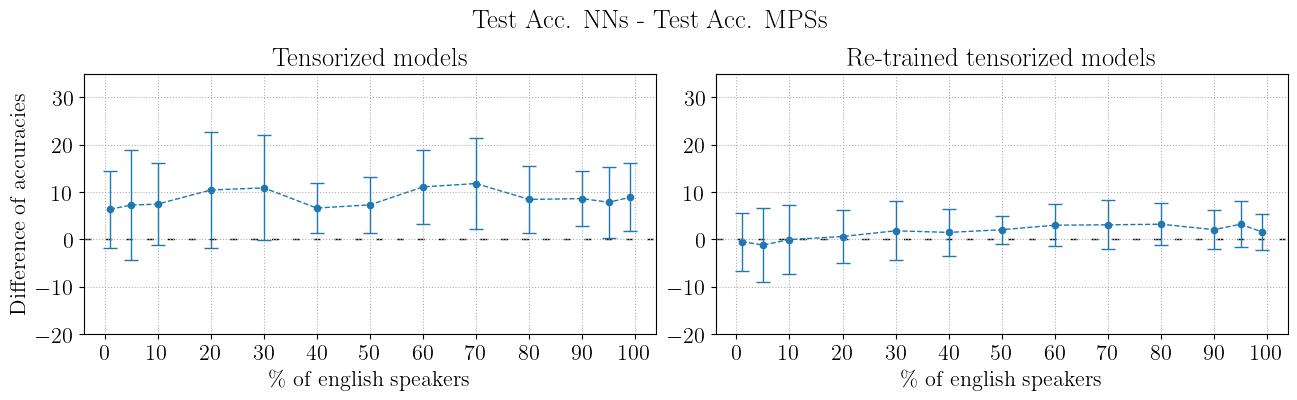

In [30]:
# plt.rc('font', family='serif', size=15)
plt.rc('font', family='serif', serif='Computer Modern', size=16)
plt.rc('text', usetex=True)

colormap = plt.get_cmap("tab10")

fig, axs = plt.subplots(1, 2, figsize=(13, 4))
ps = [p * 100 for p in p_english_list[1:-1]]


# Cores
# -----
means = torch.stack(list(map(lambda t: t[0] * 100,
                             acc_diffs_cores.values()))).tolist()
stds = torch.stack(list(map(lambda t: t[1] * 100,
                            acc_diffs_cores.values()))).tolist()

axs[0].errorbar(x=ps, y=means, yerr=stds, capsize=5.,
                linestyle='--', linewidth=1., color='tab:blue')
axs[0].scatter(x=ps, y=means, marker='o', s=20., color='tab:blue')

# Set axes
axs[0].set_xlabel('\% of english speakers')
axs[0].set_ylabel('Difference of accuracies')
axs[0].set_title('Tensorized models')

axs[0].set_ylim(-20, 35)
axs[0].yaxis.grid(linestyle=':')
axs[0].xaxis.grid(linestyle=':')

axs[0].set_xticks(torch.arange(100*0., 100*1.05, 10))
axs[0].set_yticks(torch.arange(-20, 35, 10))

axs[0].axhline(y=0, linestyle=(0, (5, 10)), linewidth=1.,
               color='black', zorder=-1)

# Recores
# -------
means = torch.stack(list(map(lambda t: t[0] * 100,
                             acc_diffs_recores.values()))).tolist()
stds = torch.stack(list(map(lambda t: t[1] * 100,
                            acc_diffs_recores.values()))).tolist()

axs[1].errorbar(x=ps, y=means, yerr=stds, capsize=5.,
                linestyle='--', linewidth=1., color='tab:blue')
axs[1].scatter(x=ps, y=means, marker='o', s=20., color='tab:blue')

# Set axes
axs[1].set_xlabel('\% of english speakers')
axs[1].set_title('Re-trained tensorized models')

axs[1].set_ylim(-20, 35)
axs[1].yaxis.grid(linestyle=':')
axs[1].xaxis.grid(linestyle=':')

axs[1].set_xticks(torch.arange(100*0., 100*1.05, 10))
axs[1].set_yticks(torch.arange(-20, 35, 10))

axs[1].axhline(y=0, linestyle=(0, (5, 10)), linewidth=1.,
               color='black', zorder=-1)


fig.suptitle('Test Acc. NNs - Test Acc. MPSs')

plt.tight_layout(pad=0.5)

results_dir = os.path.join(cwd, 'results', '6_privacy', 'fffc_tiny', 'attacks')
plt.savefig(os.path.join(results_dir, 'accs_nn_mps.pdf'), bbox_inches='tight')

plt.show()

## NNs and MPSs accuracies

In [3]:
combs = [(0, 0), (0, 1), (1, 0), (1, 1)]

accs_by_comb_nn = []
for l, k in combs:
    accs = {}
    for p in p_english_list[1:-1]:
        aux_acc = torch.load(
            os.path.join(cwd, 'results', '6_privacy', 'fffc_tiny',
                         'attacks', 'acc_by_class', 'nn', str(p), f'{l}_{k}.pt'),
            weights_only=False)
        accs[p] = aux_acc
    accs_by_comb_nn.append(accs)

mean_nn = {}
for p in p_english_list[1:-1]:
    s = 0
    for i in range(4):
        s += accs_by_comb_nn[i][p][0]
    mean_nn[p] = s / 4

In [4]:
combs = [(0, 0), (0, 1), (1, 0), (1, 1)]

accs_by_comb_mps = []
for l, k in combs:
    accs = {}
    for p in p_english_list[1:-1]:
        aux_acc = torch.load(
            os.path.join(cwd, 'results', '6_privacy', 'fffc_tiny',
                         'attacks', 'acc_by_class', 'cores', str(p), f'{l}_{k}.pt'),
            weights_only=False)
        accs[p] = aux_acc
    accs_by_comb_mps.append(accs)

mean_mps = {}
for p in p_english_list[1:-1]:
    s = 0
    for i in range(4):
        s += accs_by_comb_mps[i][p][0]
    mean_mps[p] = s / 4

In [5]:
combs = [(0, 0), (0, 1), (1, 0), (1, 1)]

accs_by_comb_priv_mps = []
for l, k in combs:
    accs = {}
    for p in p_english_list[1:-1]:
        aux_acc = torch.load(
            os.path.join(cwd, 'results', '6_privacy', 'fffc_tiny',
                         'attacks', 'acc_by_class', 'priv_recores', str(p), f'{l}_{k}.pt'),
            weights_only=False)
        accs[p] = aux_acc
    accs_by_comb_priv_mps.append(accs)

mean_priv_mps = {}
for p in p_english_list[1:-1]:
    s = 0
    for i in range(4):
        s += accs_by_comb_priv_mps[i][p][0]
    mean_priv_mps[p] = s / 4

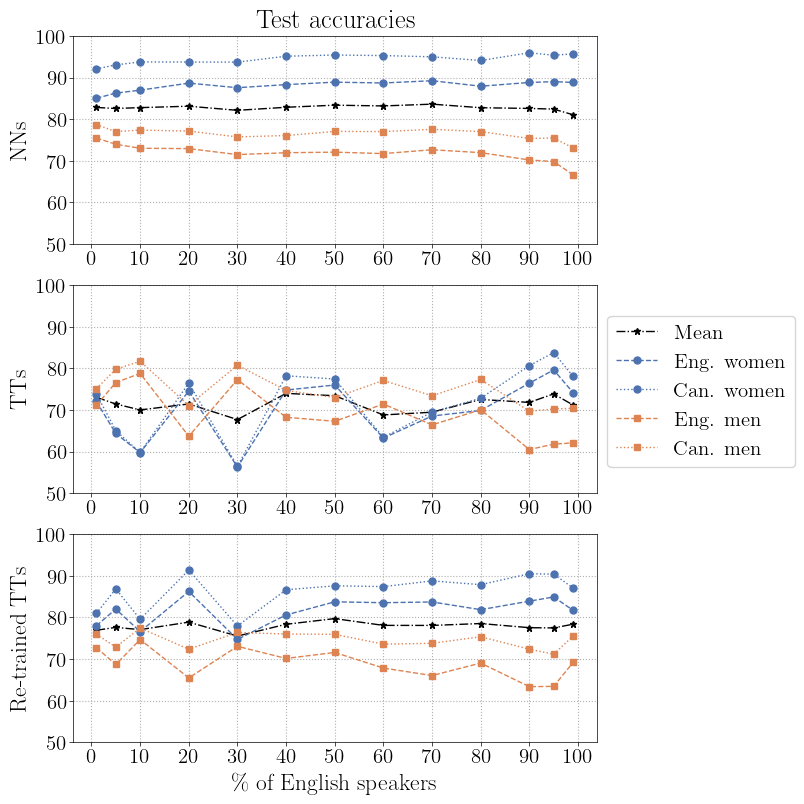

In [10]:
palette = sns.color_palette("deep")
colors = palette[0], palette[0], palette[1], palette[1]

plt.rc('font', family='serif', serif='Computer Modern', size=16)
plt.rc('text', usetex=True)


# Set global font sizes
plt.rcParams['axes.linewidth'] = 0.5  # Default is usually 1.0
plt.rcParams['axes.titlesize'] = 19  # Title font size
plt.rcParams['axes.labelsize'] = 17  # Axis label font size
plt.rcParams['xtick.labelsize'] = 15  # X-axis tick label font size
plt.rcParams['ytick.labelsize'] = 15  # Y-axis tick label font size
plt.rcParams['legend.fontsize'] = 15

markers = ['o', 'o', 's', 's']
linestyles = ['--', ':', '--', ':']
labels = ['Eng. women', 'Can. women', 'Eng. men', 'Can. men']

fig, axs = plt.subplots(3, 1, figsize=(8, 8))
ps = [p * 100 for p in p_english_list[1:-1]]

# NNs
# ---
means = [100*m for m in mean_nn.values()]

axs[0].plot(ps, means, linestyle='-.', linewidth=1., color='black',
            marker='*', markersize=5., label='Mean')

for i in range(4):
    means = torch.stack(list(map(lambda t: t[0] * 100,
                                 accs_by_comb_nn[i].values()))).tolist()
    stds = torch.stack(list(map(lambda t: t[1] * 100 * 0.5,
                                accs_by_comb_nn[i].values()))).tolist()
    
    axs[0].plot(ps, means, linestyle=linestyles[i], linewidth=1., color=colors[i],
                marker=markers[i], markersize=5., label=labels[i])

# Set axes
axs[0].set_ylabel('NNs')

axs[0].set_title('Test accuracies')

axs[0].set_ylim(50, 100)
axs[0].set_yticks(torch.arange(50, 110, 10))

axs[0].xaxis.grid(linestyle=':')
axs[0].yaxis.grid(linestyle=':')

axs[0].set_xticks(torch.arange(100*0., 100*1.05, 10))


# MPSs
# ----
means = [100*m for m in mean_mps.values()]

axs[1].plot(ps, means, linestyle='-.', linewidth=1., color='black',
            marker='*', markersize=5., label='Mean')

for i in range(4):
    means = torch.stack(list(map(lambda t: t[0] * 100,
                                 accs_by_comb_mps[i].values()))).tolist()
    stds = torch.stack(list(map(lambda t: t[1] * 100 * 0.5,
                                accs_by_comb_mps[i].values()))).tolist()

    axs[1].plot(ps, means, linestyle=linestyles[i], linewidth=1., color=colors[i],
                marker=markers[i], markersize=5., label=labels[i])

# Set axes
axs[1].set_ylabel('TTs')

axs[1].legend(loc='lower left', bbox_to_anchor=(1., 0.075))

axs[1].set_ylim(50, 100)
axs[1].set_yticks(torch.arange(50, 110, 10))

axs[1].xaxis.grid(linestyle=':')
axs[1].yaxis.grid(linestyle=':')

axs[1].set_xticks(torch.arange(100*0., 100*1.05, 10))


# Priv MPSs
# ---------
means = [100*m for m in mean_priv_mps.values()]

axs[2].plot(ps, means, linestyle='-.', linewidth=1., color='black',
            marker='*', markersize=5., label='Mean')

for i in range(4):
    means = torch.stack(list(map(lambda t: t[0] * 100,
                                 accs_by_comb_priv_mps[i].values()))).tolist()
    stds = torch.stack(list(map(lambda t: t[1] * 100 * 0.5,
                                accs_by_comb_priv_mps[i].values()))).tolist()

    axs[2].plot(ps, means, linestyle=linestyles[i], linewidth=1., color=colors[i],
                marker=markers[i], markersize=5., label=labels[i])

# Set axes
axs[2].set_ylabel('Re-trained TTs')
axs[2].set_xlabel('\% of English speakers')

axs[2].set_ylim(50, 100)
axs[2].set_yticks(torch.arange(50, 110, 10))

axs[2].xaxis.grid(linestyle=':')
axs[2].yaxis.grid(linestyle=':')

axs[2].set_xticks(torch.arange(100*0., 100*1.05, 10))


# fig.suptitle('Test accuracies')

plt.tight_layout(pad=0.25)

for i in range(3):
    axs[i].tick_params(axis='both', which='major', pad=1,
                       direction='out', length=3, width=0.5)  # Default is usually around 6-10
    axs[i].tick_params(axis='both', which='minor', pad=1,
                       direction='out', length=3, width=0.5)


results_dir = os.path.join(cwd, 'results', '6_privacy', 'fffc_tiny', 'attacks')
plt.savefig(os.path.join(results_dir, 'acc_by_class2.pdf'), bbox_inches='tight')

plt.show()

## NNs

In [41]:
n_samples_dataset = 50
n_samples = 25

assert n_samples <= n_samples_dataset

In [42]:
# Create dataset
results_dir = os.path.join(cwd, 'results', '6_privacy',
                           'fffc_tiny', 'attacks', 'nn')

datasets = {}
for p in p_english_list[:7]:
    # print(p)
    samples = []
    labels = []
    for idx in range(10):
        # print('\t', idx)
        for s in range(25):
            # print('\t\t', s)
            for aux_p in [p, 1 - p]:
                # print('\t\t\t', aux_p)
                model_dir = os.path.join(results_dir, str(aux_p),
                                         str(idx), f'{s}.pt')
                if os.path.exists(model_dir):
                    sample = torch.load(model_dir, weights_only=False)
                    sample.requires_grad = False
                    label = 0 if aux_p < 0.5 else 1
                    
                    sample = torch.cat(
                        [sample[(i*n_samples_dataset):(i*n_samples_dataset + n_samples)]
                         for i in range(4)] + [sample[(4*n_samples_dataset):]],
                        dim=0)
                    
                    samples.append(sample)
                    labels.append(label)
    
    samples = torch.stack(samples, dim=0)
    labels = torch.Tensor(labels)
    
    datasets[p] = (samples, labels)

In [43]:
# Black-box
bb_attack_nn = {}
for p in p_english_list[:7]:
    train_scores = []
    test_scores = []
    k_folds = 10
    for i in range(k_folds):
        X, y = datasets[p]
        scaler = StandardScaler().fit(X)
        
        max_len = len(y)
        step = max_len // k_folds
        train = torch.cat([torch.arange(0, i * step),
                           torch.arange((i + 1) * step, max_len)], dim=0)
        test = torch.arange(i * step, (i + 1) * step)
        
        
        X_train = X[train]
        scaler = scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        
        y_train = y[train]
        
        
        X_test = X[test]
        scaler = scaler.fit(X_test)
        X_test = scaler.transform(X_test)
        
        y_test = y[test]
        
        
        clf = LogisticRegression(max_iter=1000)
        clf = clf.fit(X_train[:, :(4 * n_samples)], y_train)
        
        train_score = clf.score(X_train[:, :(4 * n_samples)], y_train)
        test_score = clf.score(X_test[:, :(4 * n_samples)], y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)
    
    train_scores = torch.Tensor(train_scores)
    test_scores = torch.Tensor(test_scores)
    print(p, train_scores.mean(), test_scores.mean(), test_scores.std())
    
    bb_attack_nn[p] = (test_scores.mean(), test_scores.std())

0.005 tensor(0.9707) tensor(0.8900) tensor(0.1386)
0.01 tensor(0.9816) tensor(0.9100) tensor(0.1008)
0.05 tensor(0.9773) tensor(0.9020) tensor(0.0872)
0.1 tensor(0.9316) tensor(0.8540) tensor(0.0597)
0.2 tensor(0.9240) tensor(0.8120) tensor(0.0855)
0.3 tensor(0.8967) tensor(0.7860) tensor(0.1625)
0.4 tensor(0.8638) tensor(0.7400) tensor(0.1099)


In [44]:
# White-box
wb_attack_nn = {}
for p in p_english_list[:7]:
    train_scores = []
    test_scores = []
    k_folds = 10
    for i in range(k_folds):
        X, y = datasets[p]
        scaler = StandardScaler().fit(X)
        
        max_len = len(y)
        step = max_len // k_folds
        train = torch.cat([torch.arange(0, i * step),
                           torch.arange((i + 1) * step, max_len)], dim=0)
        test = torch.arange(i * step, (i + 1) * step)
        
        
        X_train = X[train]
        
        X_train_bb = X_train[:, :(4*n_samples)]
        scaler = scaler.fit(X_train_bb)
        X_train_bb = scaler.transform(X_train_bb)
        
        X_train_wb = X_train[:, (4*n_samples):]
        scaler = scaler.fit(X_train_wb)
        X_train_wb = scaler.transform(X_train_wb)
        
        y_train = y[train]
        
        
        X_test = X[test]
        
        X_test_bb = X_test[:, :(4*n_samples)]
        scaler = scaler.fit(X_test_bb)
        X_test_bb = scaler.transform(X_test_bb)
        
        X_test_wb = X_test[:, (4*n_samples):]
        scaler = scaler.fit(X_test_wb)
        X_test_wb = scaler.transform(X_test_wb)
        
        y_test = y[test]
        
        
        clf_bb = LogisticRegression(max_iter=1000)
        clf_bb = clf_bb.fit(X_train_bb[:(step * (k_folds - 1) // 2)],
                            y_train[:(step * (k_folds - 1) // 2)])
        
        clf_wb = LogisticRegression(max_iter=1000)
        clf_wb = clf_wb.fit(X_train_wb[:(step * (k_folds - 1) // 2)],
                            y_train[:(step * (k_folds - 1) // 2)])
        
        
        X_train = torch.stack(
            [torch.Tensor(clf_bb.predict(X_train_bb[(step * (k_folds - 1) // 2):])),
             torch.Tensor(clf_wb.predict(X_train_wb[(step * (k_folds - 1) // 2):]))],
            dim=1)
        X_test = torch.stack(
            [torch.Tensor(clf_bb.predict(X_test_bb)),
             torch.Tensor(clf_wb.predict(X_test_wb))],
            dim=1)
        
        scaler = scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        
        scaler = scaler.fit(X_test)
        X_test = scaler.transform(X_test)
        
        
        clf = LogisticRegression(max_iter=1000)
        clf = clf.fit(X_train, y_train[(step * (k_folds - 1) // 2):])
        
        train_score = clf.score(X_train, y_train[(step * (k_folds - 1) // 2):])
        test_score = clf.score(X_test, y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)
    
    train_scores = torch.Tensor(train_scores)
    test_scores = torch.Tensor(test_scores)
    print(p, train_scores.mean(), test_scores.mean(), test_scores.std())
    
    wb_attack_nn[p] = (test_scores.mean(), test_scores.std())

0.005 tensor(0.9404) tensor(0.9580) tensor(0.0485)
0.01 tensor(0.9538) tensor(0.9760) tensor(0.0227)
0.05 tensor(0.9564) tensor(0.9240) tensor(0.0965)
0.1 tensor(0.9409) tensor(0.9220) tensor(0.0512)
0.2 tensor(0.9409) tensor(0.9460) tensor(0.0401)
0.3 tensor(0.9498) tensor(0.9280) tensor(0.0732)
0.4 tensor(0.9062) tensor(0.9340) tensor(0.0737)


In [45]:
# Only white-box
owb_attack_nn = {}
for p in p_english_list[:7]:
    train_scores = []
    test_scores = []
    k_folds = 10
    for i in range(k_folds):
        X, y = datasets[p]
        scaler = StandardScaler().fit(X)
        
        max_len = len(y)
        step = max_len // k_folds
        train = torch.cat([torch.arange(0, i * step),
                           torch.arange((i + 1) * step, max_len)], dim=0)
        test = torch.arange(i * step, (i + 1) * step)
        
        
        X_train = X[train]
        scaler = scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        
        y_train = y[train]
        
        
        X_test = X[test]
        scaler = scaler.fit(X_test)
        X_test = scaler.transform(X_test)
        
        y_test = y[test]
        
        
        clf = LogisticRegression(max_iter=1000)
        clf = clf.fit(X_train[:, (4*n_samples):], y_train)
        
        train_score = clf.score(X_train[:, (4*n_samples):], y_train)
        test_score = clf.score(X_test[:, (4*n_samples):], y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)
    
    train_scores = torch.Tensor(train_scores)
    test_scores = torch.Tensor(test_scores)
    print(p, train_scores.mean(), test_scores.mean(), test_scores.std())
    
    owb_attack_nn[p] = (test_scores.mean(), test_scores.std())

0.005 tensor(1.) tensor(0.9540) tensor(0.0422)
0.01 tensor(1.) tensor(0.9880) tensor(0.0169)
0.05 tensor(1.) tensor(0.9660) tensor(0.0433)
0.1 tensor(1.) tensor(0.9720) tensor(0.0343)
0.2 tensor(1.) tensor(0.9840) tensor(0.0207)
0.3 tensor(1.) tensor(0.9680) tensor(0.0316)
0.4 tensor(1.) tensor(0.9700) tensor(0.0254)


## MPS

In [46]:
# Create dataset
results_dir = os.path.join(cwd, 'results', '6_privacy',
                           'fffc_tiny', 'attacks', 'cores')

datasets = {}
for p in p_english_list[:7]:
    samples = []
    labels = []
    for idx in range(10):
        for s in range(25):
            for aux_p in [p, 1 - p]:
                sample = torch.load(
                    os.path.join(results_dir, str(aux_p), str(idx), f'{s}.pt'),
                    weights_only=False
                    )
                sample.requires_grad = False
                label = 0 if aux_p < 0.5 else 1
                
                sample = torch.cat(
                        [sample[(i*n_samples_dataset):(i*n_samples_dataset + n_samples)]
                         for i in range(4)] + [sample[(4*n_samples_dataset):]],
                        dim=0)
                
                samples.append(sample)
                labels.append(label)
    
    min_len = samples[0].size(0)
    for s in samples[1:]:
        if s.size(0) < min_len:
            min_len = s.size(0)
    
    samples = [s[:min_len] for s in samples]
    
    samples = torch.stack(samples, dim=0)
    labels = torch.Tensor(labels)
    
    datasets[p] = (samples, labels)

In [47]:
# Black-box
bb_attack_mps_0_0 = {}
for p in p_english_list[:7]:
    train_scores = []
    test_scores = []
    k_folds = 10
    for i in range(k_folds):
        X, y = datasets[p]
        scaler = StandardScaler().fit(X)
        
        max_len = len(y)
        step = max_len // k_folds
        train = torch.cat([torch.arange(0, i * step),
                           torch.arange((i + 1) * step, max_len)], dim=0)
        test = torch.arange(i * step, (i + 1) * step)
        
        
        X_train = X[train]
        scaler = scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        
        y_train = y[train]
        
        
        X_test = X[test]
        scaler = scaler.fit(X_test)
        X_test = scaler.transform(X_test)
        
        y_test = y[test]
        
        
        clf = LogisticRegression(max_iter=1000)
        clf = clf.fit(X_train[:, :(4 * n_samples)], y_train)
        
        train_score = clf.score(X_train[:, :(4 * n_samples)], y_train)
        test_score = clf.score(X_test[:, :(4 * n_samples)], y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)
    
    train_scores = torch.Tensor(train_scores)
    test_scores = torch.Tensor(test_scores)
    print(p, train_scores.mean(), test_scores.mean(), test_scores.std())
    
    bb_attack_mps_0_0[p] = (test_scores.mean(), test_scores.std())

0.005 tensor(0.9316) tensor(0.7720) tensor(0.1503)
0.01 tensor(0.8933) tensor(0.6780) tensor(0.1374)
0.05 tensor(0.9044) tensor(0.7400) tensor(0.1514)
0.1 tensor(0.8942) tensor(0.7780) tensor(0.1202)
0.2 tensor(0.8722) tensor(0.5860) tensor(0.1935)
0.3 tensor(0.8807) tensor(0.6220) tensor(0.2073)
0.4 tensor(0.8858) tensor(0.6200) tensor(0.1356)


In [48]:
# White-box
wb_attack_mps_0_0 = {}
for p in p_english_list[:7]:
    train_scores = []
    test_scores = []
    k_folds = 10
    for i in range(k_folds):
        X, y = datasets[p]
        scaler = StandardScaler().fit(X)
        
        max_len = len(y)
        step = max_len // k_folds
        train = torch.cat([torch.arange(0, i * step),
                           torch.arange((i + 1) * step, max_len)], dim=0)
        test = torch.arange(i * step, (i + 1) * step)
        
        
        X_train = X[train]
        
        X_train_bb = X_train[:, :(4*n_samples)]
        scaler = scaler.fit(X_train_bb)
        X_train_bb = scaler.transform(X_train_bb)
        
        X_train_wb = X_train[:, (4*n_samples):]
        scaler = scaler.fit(X_train_wb)
        X_train_wb = scaler.transform(X_train_wb)
        
        y_train = y[train]
        
        
        X_test = X[test]
        
        X_test_bb = X_test[:, :(4*n_samples)]
        scaler = scaler.fit(X_test_bb)
        X_test_bb = scaler.transform(X_test_bb)
        
        X_test_wb = X_test[:, (4*n_samples):]
        scaler = scaler.fit(X_test_wb)
        X_test_wb = scaler.transform(X_test_wb)
        
        y_test = y[test]
        
        
        clf_bb = LogisticRegression(max_iter=1000)
        clf_bb = clf_bb.fit(X_train_bb[:(step * (k_folds - 1) // 2)],
                            y_train[:(step * (k_folds - 1) // 2)])
        
        clf_wb = LogisticRegression(max_iter=1000)
        clf_wb = clf_wb.fit(X_train_wb[:(step * (k_folds - 1) // 2)],
                            y_train[:(step * (k_folds - 1) // 2)])
        
        
        X_train = torch.stack(
            [torch.Tensor(clf_bb.predict(X_train_bb[(step * (k_folds - 1) // 2):])),
             torch.Tensor(clf_wb.predict(X_train_wb[(step * (k_folds - 1) // 2):]))],
            dim=1)
        X_test = torch.stack(
            [torch.Tensor(clf_bb.predict(X_test_bb)),
             torch.Tensor(clf_wb.predict(X_test_wb))],
            dim=1)
        
        scaler = scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        
        scaler = scaler.fit(X_test)
        X_test = scaler.transform(X_test)
        
        
        clf = LogisticRegression(max_iter=1000)
        clf = clf.fit(X_train, y_train[(step * (k_folds - 1) // 2):])
        
        train_score = clf.score(X_train, y_train[(step * (k_folds - 1) // 2):])
        test_score = clf.score(X_test, y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)
    
    train_scores = torch.Tensor(train_scores)
    test_scores = torch.Tensor(test_scores)
    print(p, train_scores.mean(), test_scores.mean(), test_scores.std())
    
    wb_attack_mps_0_0[p] = (test_scores.mean(), test_scores.std())

0.005 tensor(0.7707) tensor(0.7420) tensor(0.1325)
0.01 tensor(0.6502) tensor(0.6720) tensor(0.1212)
0.05 tensor(0.7084) tensor(0.7280) tensor(0.1297)
0.1 tensor(0.6738) tensor(0.6960) tensor(0.1138)
0.2 tensor(0.6569) tensor(0.6400) tensor(0.1275)
0.3 tensor(0.6702) tensor(0.6300) tensor(0.0990)
0.4 tensor(0.6596) tensor(0.5680) tensor(0.1850)


In [49]:
# Only white-box
owb_attack_mps_0_0 = {}
for p in p_english_list[:7]:
    train_scores = []
    test_scores = []
    k_folds = 10
    for i in range(k_folds):
        X, y = datasets[p]
        scaler = StandardScaler().fit(X)
        
        max_len = len(y)
        step = max_len // k_folds
        train = torch.cat([torch.arange(0, i * step),
                           torch.arange((i + 1) * step, max_len)], dim=0)
        test = torch.arange(i * step, (i + 1) * step)
        
        
        X_train = X[train]
        scaler = scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        
        y_train = y[train]
        
        
        X_test = X[test]
        scaler = scaler.fit(X_test)
        X_test = scaler.transform(X_test)
        
        y_test = y[test]
        
        
        clf = LogisticRegression(max_iter=1000)
        clf = clf.fit(X_train[:, (4*n_samples):], y_train)
        
        train_score = clf.score(X_train[:, (4*n_samples):], y_train)
        test_score = clf.score(X_test[:, (4*n_samples):], y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)
    
    train_scores = torch.Tensor(train_scores)
    test_scores = torch.Tensor(test_scores)
    print(p, train_scores.mean(), test_scores.mean(), test_scores.std())
    
    owb_attack_mps_0_0[p] = (test_scores.mean(), test_scores.std())

0.005 tensor(1.) tensor(0.6820) tensor(0.1043)
0.01 tensor(1.) tensor(0.6100) tensor(0.0598)
0.05 tensor(1.) tensor(0.7600) tensor(0.1015)
0.1 tensor(1.) tensor(0.7060) tensor(0.1059)
0.2 tensor(1.) tensor(0.6700) tensor(0.1084)
0.3 tensor(1.) tensor(0.6360) tensor(0.1150)
0.4 tensor(1.) tensor(0.5960) tensor(0.0965)


## Re-trained MPS

In [50]:
# Create dataset
results_dir = os.path.join(cwd, 'results', '6_privacy',
                           'fffc_tiny', 'attacks', 'recores')

datasets = {}
for p in p_english_list[:7]:
    samples = []
    labels = []
    for idx in range(10):
        for s in range(25):
            for aux_p in [p, 1 - p]:
                sample = torch.load(
                    os.path.join(results_dir, str(aux_p), str(idx), f'{s}.pt'),
                    weights_only=False
                    )
                sample.requires_grad = False
                label = 0 if aux_p < 0.5 else 1
                
                sample = torch.cat(
                        [sample[(i*n_samples_dataset):(i*n_samples_dataset + n_samples)]
                         for i in range(4)] + [sample[(4*n_samples_dataset):]],
                        dim=0)
                
                samples.append(sample)
                labels.append(label)
    
    min_len = samples[0].size(0)
    for s in samples[1:]:
        if s.size(0) < min_len:
            min_len = s.size(0)
    
    samples = [s[:min_len] for s in samples]
    
    samples = torch.stack(samples, dim=0)
    labels = torch.Tensor(labels)
    
    datasets[p] = (samples, labels)

In [51]:
# Black-box
bb_attack_mps_1_0 = {}
for p in p_english_list[:7]:
    train_scores = []
    test_scores = []
    k_folds = 10
    for i in range(k_folds):
        X, y = datasets[p]
        X, y = X[~X.isnan().any(dim=1)], y[~X.isnan().any(dim=1)]
        scaler = StandardScaler().fit(X)
        
        max_len = len(y)
        step = max_len // k_folds
        train = torch.cat([torch.arange(0, i * step),
                           torch.arange((i + 1) * step, max_len)], dim=0)
        test = torch.arange(i * step, (i + 1) * step)
        
        
        X_train = X[train]
        scaler = scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        
        y_train = y[train]
        
        
        X_test = X[test]
        scaler = scaler.fit(X_test)
        X_test = scaler.transform(X_test)
        
        y_test = y[test]
        
        
        clf = LogisticRegression(max_iter=1000)
        clf = clf.fit(X_train[:, :(4 * n_samples)], y_train)
        
        train_score = clf.score(X_train[:, :(4 * n_samples)], y_train)
        test_score = clf.score(X_test[:, :(4 * n_samples)], y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)
    
    train_scores = torch.Tensor(train_scores)
    test_scores = torch.Tensor(test_scores)
    print(p, train_scores.mean(), test_scores.mean(), test_scores.std())
    
    bb_attack_mps_1_0[p] = (test_scores.mean(), test_scores.std())

0.005 tensor(0.8496) tensor(0.7080) tensor(0.1553)
0.01 tensor(0.8689) tensor(0.7420) tensor(0.1570)
0.05 tensor(0.8998) tensor(0.7560) tensor(0.1343)
0.1 tensor(0.8804) tensor(0.7640) tensor(0.1243)
0.2 tensor(0.7971) tensor(0.6080) tensor(0.1163)
0.3 tensor(0.8387) tensor(0.6400) tensor(0.1087)
0.4 tensor(0.8124) tensor(0.5920) tensor(0.0812)


In [52]:
# White-box
wb_attack_mps_1_0 = {}
for p in p_english_list[:7]:
    train_scores = []
    test_scores = []
    k_folds = 10
    for i in range(k_folds):
        X, y = datasets[p]
        X, y = X[~X.isnan().any(dim=1)], y[~X.isnan().any(dim=1)]
        scaler = StandardScaler().fit(X)
        
        max_len = len(y)
        step = max_len // k_folds
        train = torch.cat([torch.arange(0, i * step),
                           torch.arange((i + 1) * step, max_len)], dim=0)
        test = torch.arange(i * step, (i + 1) * step)
        
        
        X_train = X[train]
        
        X_train_bb = X_train[:, :(4*n_samples)]
        scaler = scaler.fit(X_train_bb)
        X_train_bb = scaler.transform(X_train_bb)
        
        X_train_wb = X_train[:, (4*n_samples):]
        scaler = scaler.fit(X_train_wb)
        X_train_wb = scaler.transform(X_train_wb)
        
        y_train = y[train]
        
        
        X_test = X[test]
        
        X_test_bb = X_test[:, :(4*n_samples)]
        scaler = scaler.fit(X_test_bb)
        X_test_bb = scaler.transform(X_test_bb)
        
        X_test_wb = X_test[:, (4*n_samples):]
        scaler = scaler.fit(X_test_wb)
        X_test_wb = scaler.transform(X_test_wb)
        
        y_test = y[test]
        
        
        clf_bb = LogisticRegression(max_iter=1000)
        clf_bb = clf_bb.fit(X_train_bb[:(step * (k_folds - 1) // 2)],
                            y_train[:(step * (k_folds - 1) // 2)])
        
        clf_wb = LogisticRegression(max_iter=1000)
        clf_wb = clf_wb.fit(X_train_wb[:(step * (k_folds - 1) // 2)],
                            y_train[:(step * (k_folds - 1) // 2)])
        
        
        X_train = torch.stack(
            [torch.Tensor(clf_bb.predict(X_train_bb[(step * (k_folds - 1) // 2):])),
             torch.Tensor(clf_wb.predict(X_train_wb[(step * (k_folds - 1) // 2):]))],
            dim=1)
        X_test = torch.stack(
            [torch.Tensor(clf_bb.predict(X_test_bb)),
             torch.Tensor(clf_wb.predict(X_test_wb))],
            dim=1)
        
        scaler = scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        
        scaler = scaler.fit(X_test)
        X_test = scaler.transform(X_test)
        
        
        clf = LogisticRegression(max_iter=1000)
        clf = clf.fit(X_train, y_train[(step * (k_folds - 1) // 2):])
        
        train_score = clf.score(X_train, y_train[(step * (k_folds - 1) // 2):])
        test_score = clf.score(X_test, y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)
    
    train_scores = torch.Tensor(train_scores)
    test_scores = torch.Tensor(test_scores)
    print(p, train_scores.mean(), test_scores.mean(), test_scores.std())
    
    wb_attack_mps_1_0[p] = (test_scores.mean(), test_scores.std())

0.005 tensor(0.6289) tensor(0.5580) tensor(0.1585)
0.01 tensor(0.7404) tensor(0.7020) tensor(0.1397)
0.05 tensor(0.7044) tensor(0.6720) tensor(0.1226)
0.1 tensor(0.7289) tensor(0.7620) tensor(0.1097)
0.2 tensor(0.6022) tensor(0.6560) tensor(0.1150)
0.3 tensor(0.7080) tensor(0.6240) tensor(0.1041)
0.4 tensor(0.6120) tensor(0.5300) tensor(0.1042)


In [53]:
# Only white-box
owb_attack_mps_1_0 = {}
for p in p_english_list[:7]:
    train_scores = []
    test_scores = []
    k_folds = 10
    for i in range(k_folds):
        X, y = datasets[p]
        X, y = X[~X.isnan().any(dim=1)], y[~X.isnan().any(dim=1)]
        scaler = StandardScaler().fit(X)
        
        max_len = len(y)
        step = max_len // k_folds
        train = torch.cat([torch.arange(0, i * step),
                           torch.arange((i + 1) * step, max_len)], dim=0)
        test = torch.arange(i * step, (i + 1) * step)
        
        
        X_train = X[train]
        scaler = scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        
        y_train = y[train]
        
        
        X_test = X[test]
        scaler = scaler.fit(X_test)
        X_test = scaler.transform(X_test)
        
        y_test = y[test]
        
        
        clf = LogisticRegression(max_iter=1000)
        clf = clf.fit(X_train[:, (4*n_samples):], y_train)
        
        train_score = clf.score(X_train[:, (4*n_samples):], y_train)
        test_score = clf.score(X_test[:, (4*n_samples):], y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)
    
    train_scores = torch.Tensor(train_scores)
    test_scores = torch.Tensor(test_scores)
    print(p, train_scores.mean(), test_scores.mean(), test_scores.std())
    
    owb_attack_mps_1_0[p] = (test_scores.mean(), test_scores.std())

0.005 tensor(1.) tensor(0.6820) tensor(0.1043)
0.01 tensor(1.) tensor(0.6100) tensor(0.0613)
0.05 tensor(1.) tensor(0.7600) tensor(0.1015)
0.1 tensor(1.) tensor(0.7080) tensor(0.1088)
0.2 tensor(1.) tensor(0.6700) tensor(0.1092)
0.3 tensor(1.) tensor(0.6360) tensor(0.1150)
0.4 tensor(1.) tensor(0.5960) tensor(0.0965)


## Re-trained private MPS

In [54]:
# Create dataset
results_dir = os.path.join(cwd, 'results', '6_privacy',
                           'fffc_tiny', 'attacks', 'priv_recores')

datasets = {}
for p in p_english_list[:7]:
    samples = []
    labels = []
    for idx in range(10):
        for s in range(25):
            for aux_p in [p, 1 - p]:
                sample = torch.load(
                    os.path.join(results_dir, str(aux_p), str(idx), f'{s}.pt'),
                    weights_only=False
                    )
                sample.requires_grad = False
                label = 0 if aux_p < 0.5 else 1
                
                sample = torch.cat(
                        [sample[(i*n_samples_dataset):(i*n_samples_dataset + n_samples)]
                         for i in range(4)] + [sample[(4*n_samples_dataset):]],
                        dim=0)
                
                samples.append(sample)
                labels.append(label)
    
    min_len = samples[0].size(0)
    for s in samples[1:]:
        if s.size(0) < min_len:
            min_len = s.size(0)
    
    samples = [s[:min_len] for s in samples]
    
    samples = torch.stack(samples, dim=0)
    labels = torch.Tensor(labels)
    
    datasets[p] = (samples, labels)

In [55]:
# Black-box
bb_attack_mps_1_1 = {}
for p in p_english_list[:7]:
    train_scores = []
    test_scores = []
    k_folds = 10
    for i in range(k_folds):
        X, y = datasets[p]
        X, y = X[~X.isnan().any(dim=1)], y[~X.isnan().any(dim=1)]
        scaler = StandardScaler().fit(X)
        
        max_len = len(y)
        step = max_len // k_folds
        train = torch.cat([torch.arange(0, i * step),
                           torch.arange((i + 1) * step, max_len)], dim=0)
        test = torch.arange(i * step, (i + 1) * step)
        
        
        X_train = X[train]
        scaler = scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        
        y_train = y[train]
        
        
        X_test = X[test]
        scaler = scaler.fit(X_test)
        X_test = scaler.transform(X_test)
        
        y_test = y[test]
        
        
        clf = LogisticRegression(max_iter=1000)
        clf = clf.fit(X_train[:, :(4 * n_samples)], y_train)
        
        train_score = clf.score(X_train[:, :(4 * n_samples)], y_train)
        test_score = clf.score(X_test[:, :(4 * n_samples)], y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)
    
    train_scores = torch.Tensor(train_scores)
    test_scores = torch.Tensor(test_scores)
    print(p, train_scores.mean(), test_scores.mean(), test_scores.std())
    
    bb_attack_mps_1_1[p] = (test_scores.mean(), test_scores.std())

0.005 tensor(0.8451) tensor(0.6940) tensor(0.1509)
0.01 tensor(0.8727) tensor(0.7440) tensor(0.1662)
0.05 tensor(0.9024) tensor(0.7520) tensor(0.1351)
0.1 tensor(0.8747) tensor(0.7660) tensor(0.1247)
0.2 tensor(0.8053) tensor(0.6060) tensor(0.1269)
0.3 tensor(0.8327) tensor(0.6220) tensor(0.0916)
0.4 tensor(0.8096) tensor(0.5900) tensor(0.0925)


In [56]:
# White-box
wb_attack_mps_1_1 = {}
for p in p_english_list[:7]:
    train_scores = []
    test_scores = []
    k_folds = 10
    for i in range(k_folds):
        X, y = datasets[p]
        X, y = X[~X.isnan().any(dim=1)], y[~X.isnan().any(dim=1)]
        scaler = StandardScaler().fit(X)
        
        max_len = len(y)
        step = max_len // k_folds
        train = torch.cat([torch.arange(0, i * step),
                           torch.arange((i + 1) * step, max_len)], dim=0)
        test = torch.arange(i * step, (i + 1) * step)
        
        
        X_train = X[train]
        
        X_train_bb = X_train[:, :(4*n_samples)]
        scaler = scaler.fit(X_train_bb)
        X_train_bb = scaler.transform(X_train_bb)
        
        X_train_wb = X_train[:, (4*n_samples):]
        scaler = scaler.fit(X_train_wb)
        X_train_wb = scaler.transform(X_train_wb)
        
        y_train = y[train]
        
        
        X_test = X[test]
        
        X_test_bb = X_test[:, :(4*n_samples)]
        scaler = scaler.fit(X_test_bb)
        X_test_bb = scaler.transform(X_test_bb)
        
        X_test_wb = X_test[:, (4*n_samples):]
        scaler = scaler.fit(X_test_wb)
        X_test_wb = scaler.transform(X_test_wb)
        
        y_test = y[test]
        
        
        clf_bb = LogisticRegression(max_iter=1000)
        clf_bb = clf_bb.fit(X_train_bb[:(step * (k_folds - 1) // 2)],
                            y_train[:(step * (k_folds - 1) // 2)])
        
        clf_wb = LogisticRegression(max_iter=1000)
        clf_wb = clf_wb.fit(X_train_wb[:(step * (k_folds - 1) // 2)],
                            y_train[:(step * (k_folds - 1) // 2)])
        
        
        X_train = torch.stack(
            [torch.Tensor(clf_bb.predict(X_train_bb[(step * (k_folds - 1) // 2):])),
             torch.Tensor(clf_wb.predict(X_train_wb[(step * (k_folds - 1) // 2):]))],
            dim=1)
        X_test = torch.stack(
            [torch.Tensor(clf_bb.predict(X_test_bb)),
             torch.Tensor(clf_wb.predict(X_test_wb))],
            dim=1)
        
        scaler = scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        
        scaler = scaler.fit(X_test)
        X_test = scaler.transform(X_test)
        
        
        clf = LogisticRegression(max_iter=1000)
        clf = clf.fit(X_train, y_train[(step * (k_folds - 1) // 2):])
        
        train_score = clf.score(X_train, y_train[(step * (k_folds - 1) // 2):])
        test_score = clf.score(X_test, y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)
    
    train_scores = torch.Tensor(train_scores)
    test_scores = torch.Tensor(test_scores)
    print(p, train_scores.mean(), test_scores.mean(), test_scores.std())
    
    wb_attack_mps_1_1[p] = (test_scores.mean(), test_scores.std())

0.005 tensor(0.6204) tensor(0.5840) tensor(0.1395)
0.01 tensor(0.7364) tensor(0.7180) tensor(0.1412)
0.05 tensor(0.6991) tensor(0.6900) tensor(0.1561)
0.1 tensor(0.7133) tensor(0.7440) tensor(0.1203)
0.2 tensor(0.5458) tensor(0.5040) tensor(0.1349)
0.3 tensor(0.6582) tensor(0.6140) tensor(0.1079)
0.4 tensor(0.5871) tensor(0.5220) tensor(0.1073)


In [57]:
# Only white-box
owb_attack_mps_1_1 = {}
for p in p_english_list[:7]:
    train_scores = []
    test_scores = []
    k_folds = 10
    for i in range(k_folds):
        X, y = datasets[p]
        X, y = X[~X.isnan().any(dim=1)], y[~X.isnan().any(dim=1)]
        scaler = StandardScaler().fit(X)
        
        max_len = len(y)
        step = max_len // k_folds
        train = torch.cat([torch.arange(0, i * step),
                           torch.arange((i + 1) * step, max_len)], dim=0)
        test = torch.arange(i * step, (i + 1) * step)
        
        
        X_train = X[train]
        scaler = scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        
        y_train = y[train]
        
        
        X_test = X[test]
        scaler = scaler.fit(X_test)
        X_test = scaler.transform(X_test)
        
        y_test = y[test]
        
        
        clf = LogisticRegression(max_iter=1000)
        clf = clf.fit(X_train[:, (4*n_samples):], y_train)
        
        train_score = clf.score(X_train[:, (4*n_samples):], y_train)
        test_score = clf.score(X_test[:, (4*n_samples):], y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)
    
    train_scores = torch.Tensor(train_scores)
    test_scores = torch.Tensor(test_scores)
    print(p, train_scores.mean(), test_scores.mean(), test_scores.std())
    
    owb_attack_mps_1_1[p] = (test_scores.mean(), test_scores.std())

0.005 tensor(1.) tensor(0.4940) tensor(0.0880)
0.01 tensor(1.) tensor(0.5100) tensor(0.0750)
0.05 tensor(1.) tensor(0.4520) tensor(0.0875)
0.1 tensor(1.) tensor(0.4540) tensor(0.0789)
0.2 tensor(1.) tensor(0.4900) tensor(0.0829)
0.3 tensor(1.) tensor(0.4640) tensor(0.0679)
0.4 tensor(1.) tensor(0.5380) tensor(0.0656)


## Figure

In [ ]:
results_dir = os.path.join(cwd, 'results', '6_privacy',
                           'fffc_tiny', 'attacks')

bb_attacks = [bb_attack_nn,
              bb_attack_mps_0_0,
              bb_attack_mps_1_0,
              bb_attack_mps_1_1]
wb_attacks = [wb_attack_nn,
              wb_attack_mps_0_0,
              wb_attack_mps_1_0,
              wb_attack_mps_1_1]
owb_attacks = [owb_attack_nn,
               owb_attack_mps_0_0,
               owb_attack_mps_1_0,
               owb_attack_mps_1_1]

torch.save(bb_attacks, os.path.join(results_dir, 'bb_attacks.pt'))
torch.save(wb_attacks, os.path.join(results_dir, 'wb_attacks.pt'))
torch.save(owb_attacks, os.path.join(results_dir, 'owb_attacks.pt'))

In [32]:
results_dir = os.path.join(cwd, 'results', '6_privacy',
                           'fffc_tiny', 'attacks')

bb_attacks = torch.load(os.path.join(results_dir, 'bb_attacks.pt'),
                        weights_only=False)
wb_attacks = torch.load(os.path.join(results_dir, 'wb_attacks.pt'),
                        weights_only=False)
owb_attacks = torch.load(os.path.join(results_dir, 'owb_attacks.pt'),
                         weights_only=False)

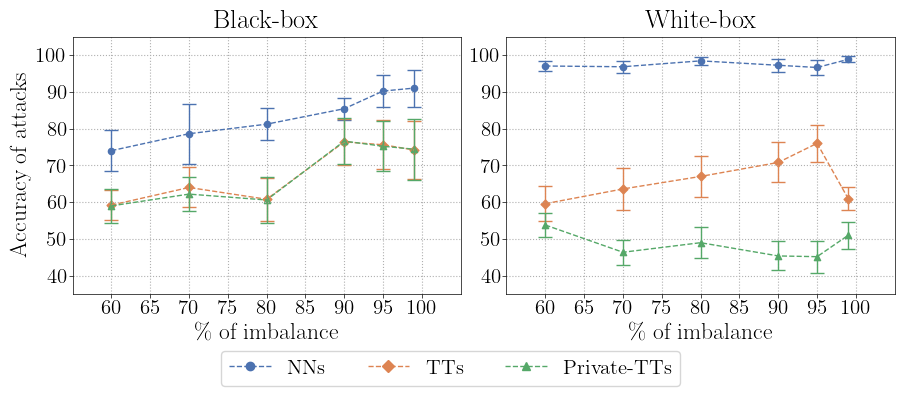

In [46]:
palette = sns.color_palette("deep")
colors = palette[0], palette[1], palette[1], palette[2]

plt.rc('font', family='serif', serif='Computer Modern', size=16)
plt.rc('text', usetex=True)


# Set global font sizes
plt.rcParams['axes.linewidth'] = 0.5  # Default is usually 1.0
plt.rcParams['axes.titlesize'] = 19  # Title font size
plt.rcParams['axes.labelsize'] = 17  # Axis label font size
plt.rcParams['xtick.labelsize'] = 15  # X-axis tick label font size
plt.rcParams['ytick.labelsize'] = 15  # Y-axis tick label font size
plt.rcParams['legend.fontsize'] = 15


markers = ['o', 's', 'D', '^']
labels = ['NNs', 'TTs', 'TTs', 'Private-TTs']

fig, axs = plt.subplots(1, 2, figsize=(9, 3.5))

p_english_list = [0.005, 0.01, 0.05,
                 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                 0.95, 0.99, 0.995]
ps = [100*(1-p) for p in p_english_list[:7]]
ps.reverse()


# BB
# --
for i in [0, 2, 3]:
    means = torch.stack(list(map(lambda t: t[0] * 100,
                                 bb_attacks[i].values()))).tolist()
    stds = torch.stack(list(map(lambda t: t[1] * 100 * 0.5,
                                bb_attacks[i].values()))).tolist()
    
    means.reverse()
    stds.reverse()

    axs[0].errorbar(x=ps[:-1], y=means[:-1], yerr=stds[:-1], capsize=5.,
                    linestyle='--', linewidth=1., color=colors[i])
    axs[0].scatter(x=ps[:-1], y=means[:-1], marker=markers[i], s=20., color=colors[i])

    # Set axes
    axs[0].set_xlabel('\% of imbalance')
    axs[0].set_ylabel('Accuracy of attacks')
    axs[0].set_title('Black-box')

    axs[0].yaxis.grid(linestyle=':')
    axs[0].xaxis.grid(linestyle=':')

    axs[0].set_xlim(55, 105)
    axs[0].set_ylim(35, 105)

    axs[0].set_xticks(torch.arange(100*0.6, 100*1.03, 5))
    axs[0].set_yticks(torch.arange(100*0.4, 100*1.05, 10))

# OWB
# ---
for i in [0, 2, 3]:
    means = torch.stack(list(map(lambda t: t[0] * 100,
                                 owb_attacks[i].values()))).tolist()
    stds = torch.stack(list(map(lambda t: t[1] * 100 * 0.5,
                                owb_attacks[i].values()))).tolist()
    
    means.reverse()
    stds.reverse()

    axs[1].errorbar(x=ps[:-1], y=means[:-1], yerr=stds[:-1], capsize=5.,
                    linestyle='--', linewidth=1., color=colors[i])
    axs[1].scatter(x=ps[:-1], y=means[:-1], marker=markers[i], s=20., color=colors[i],
                   label=labels[i])

    # Set axes
    axs[1].set_xlabel('\% of imbalance')
    axs[1].set_title('White-box')

    axs[1].yaxis.grid(linestyle=':')
    axs[1].xaxis.grid(linestyle=':')
    
    axs[1].set_xlim(55, 105)
    axs[1].set_ylim(35, 105)

    axs[1].set_xticks(torch.arange(100*0.6, 100*1.03, 5))
    axs[1].set_yticks(torch.arange(100*0.4, 100*1.05, 10))
    
    # axs[1].legend(loc='lower left', bbox_to_anchor=(1., 0.35))
    
    
    
# Create custom legend handles
from matplotlib.lines import Line2D

custom_handles = [
    Line2D([0], [0], color=colors[i], linestyle='--', marker=markers[i], markersize=6, linewidth=1., label=labels[i])
    for i in [0, 2, 3]
]

# Add a single legend to the figure
fig.legend(
    handles=custom_handles,
    loc='lower center',
    ncol=4,
    bbox_to_anchor=(0.5, -0.12),  # Centered below the plots
    # frameon=False
)


plt.tight_layout(pad=0.25)

for i in range(2):
    axs[i].tick_params(axis='both', which='major', pad=1,
                       direction='out', length=3, width=0.5)  # Default is usually around 6-10
    axs[i].tick_params(axis='both', which='minor', pad=1,
                       direction='out', length=3, width=0.5)

results_dir = os.path.join(cwd, 'results', '6_privacy', 'fffc_tiny', 'attacks') 
plt.savefig(os.path.join(results_dir, 'attacks.pdf'), bbox_inches='tight')

plt.show()